Classification problem. Prediction of the loan eligibility process based on customer detail:

1.   **Loan_ID** : Unique Loan ID
2.   **Gender** : Male/ Female
3. **Married** : Applicant married (Y/N)
4. **Dependents** : Number of dependents 
5. **Education** : Applicant Education (Graduate/ Under Graduate)
6. **Self_Employed** : Self employed (Y/N)
7. **ApplicantIncome** : Applicant income
8. **CoapplicantIncome** : Coapplicant income
9. **LoanAmount** : Loan amount in thousands of dollars
10. **Loan_Amount_Term** : Term of loan in months
11. **Credit_History** : credit history meets guidelines yes or no
12. **Property_Area** : Urban/ Semi Urban/ Rural
13. **Loan_Status** : Loan approved (Y/N) this is the target variable


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


This notebook runs all the functions developed in **functions.ipynb**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


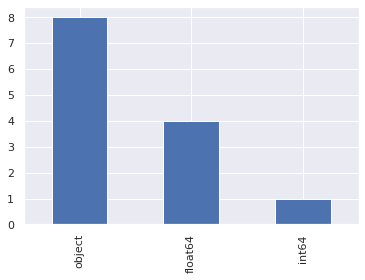

In [1]:
#MAIN_V5
# Project ML RWTH - Loan Granted?

#%%
# Run functions code
%run /content/functions3.ipynb

#%%
# Load dataframe and set data types. 
import pandas as pd

df_original = pd.read_csv(r'/content/data.csv')
df = df_original.copy()
columns = df.columns.to_list()

#Data type evaluation
df.info()
(df.dtypes).value_counts().plot(kind="bar")  # Categorical, boolean and numeric variables but there are some variable-types not loaded correctly. 
df = df.astype({
    'Gender': 'category',
    'Married': 'category',
    'Dependents': 'category',
    'Education': 'category',
    'Self_Employed': 'category',
    'Credit_History': 'category',
    'Property_Area': 'category',
    'Loan_Status': 'category',
    'Loan_Amount_Term': 'category',
    'ApplicantIncome': 'float64'
    })

# Exploratory Data Analysis

## Univariate Analysis: Numerical Variables

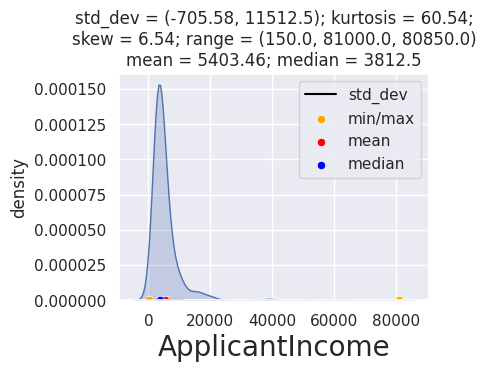

In [ ]:
#%%
# Distribution of numerical variables
# Numerical datatypes

UVA_numeric(df,['ApplicantIncome'])




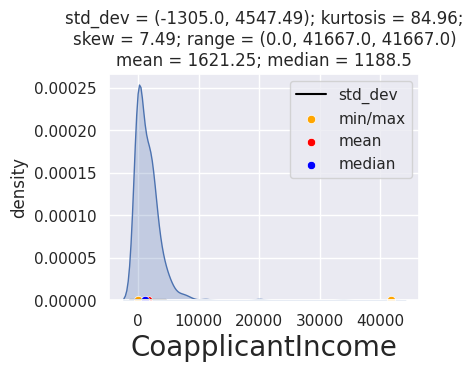

In [ ]:
UVA_numeric(df,['CoapplicantIncome'])


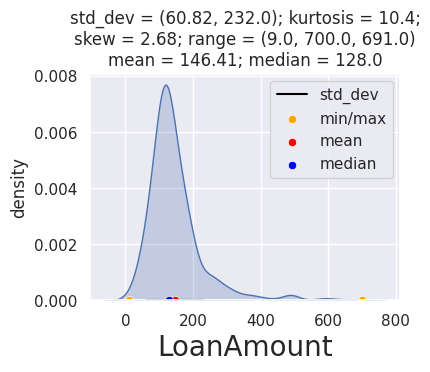

In [ ]:
UVA_numeric(df,['LoanAmount'])

We'll do normality check to find out outliers

Q_Q plot for  ApplicantIncome


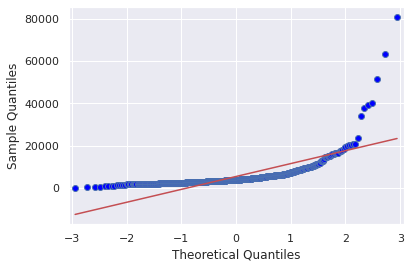

Q_Q plot for  CoapplicantIncome


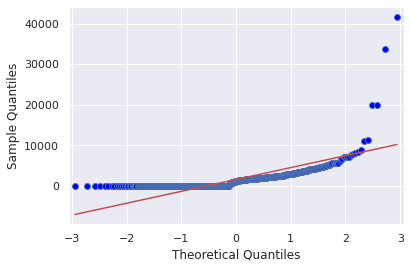

Q_Q plot for  LoanAmount


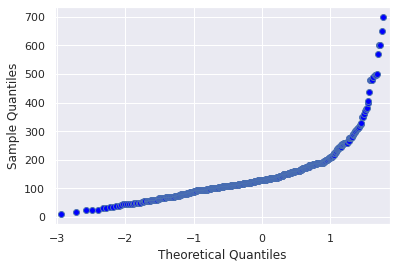

In [ ]:
#%%
# Normality check of numerical variables

normality_check(df,['ApplicantIncome'])
normality_check(df,['CoapplicantIncome'])
normality_check(df,['LoanAmount'])   

The distributions for ApplicantIncome, CoapplicantIncome and LoanAmount are **right-skewed with outliers.**

Univariate Outlier Detection: Numerical Variable

True


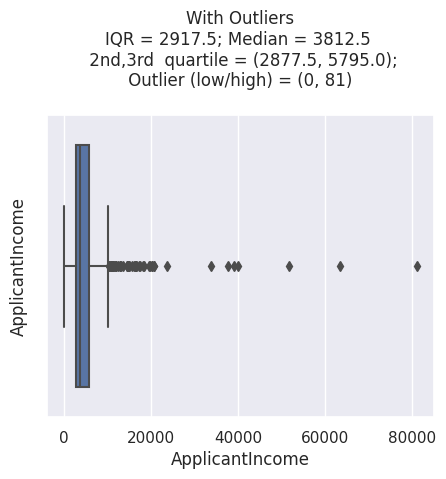

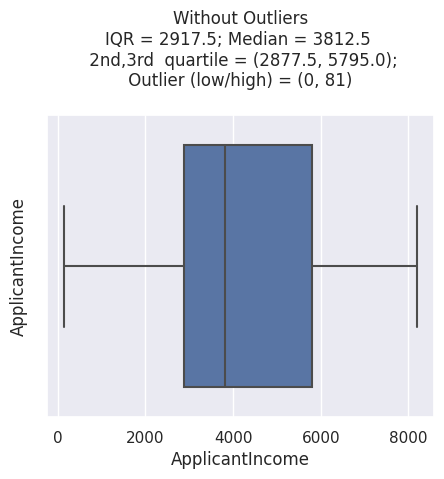

In [ ]:
UVA_outlier(df,['ApplicantIncome'])
UVA_outlier(df,['ApplicantIncome'],include_outlier=False)

True


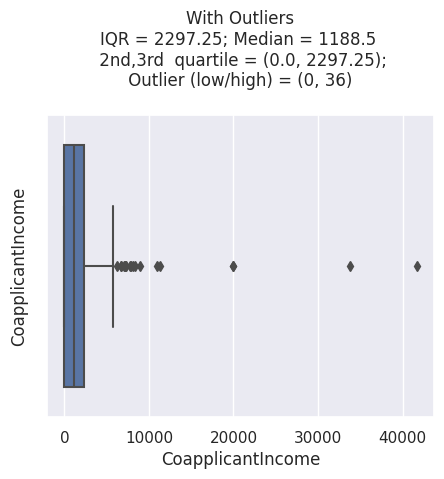

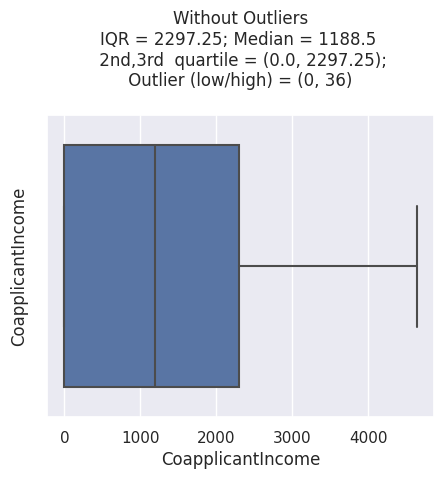

In [ ]:
UVA_outlier(df,['CoapplicantIncome'])
UVA_outlier(df,['CoapplicantIncome'],include_outlier=False)

True


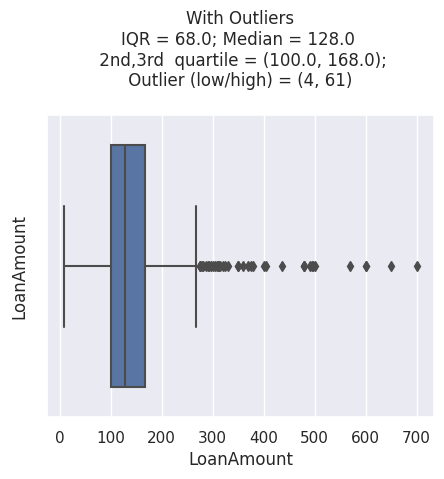

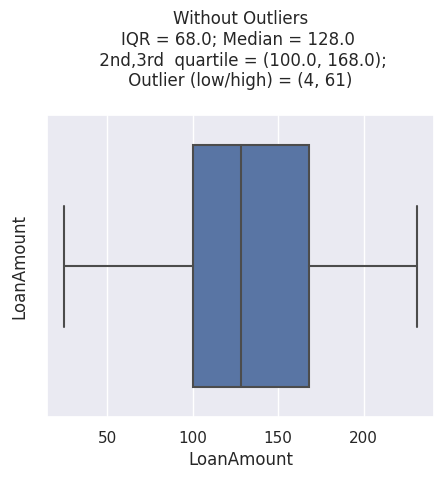

In [ ]:
UVA_outlier(df,['LoanAmount'])
UVA_outlier(df,['LoanAmount'],include_outlier=False)

 Univariate Analysis : Categorical Varibales

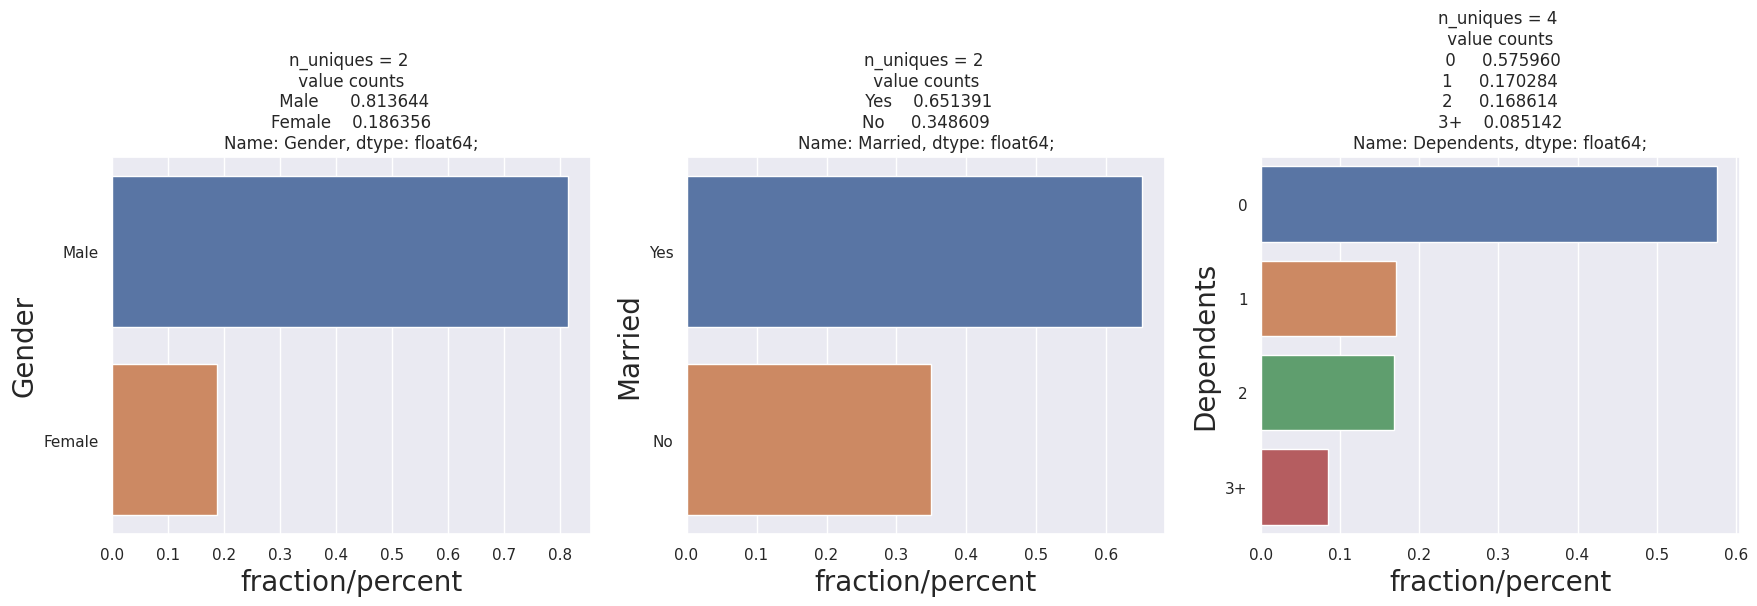

In [ ]:
UVA_category(df,['Gender','Married','Dependents'])

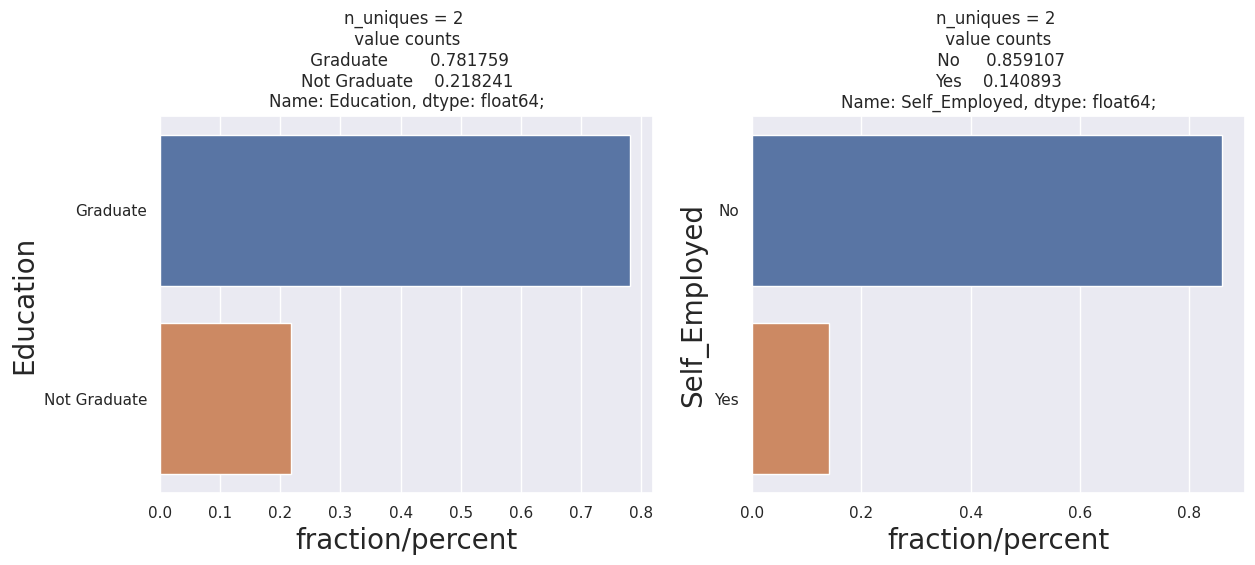

In [ ]:
UVA_category(df,['Education','Self_Employed'])

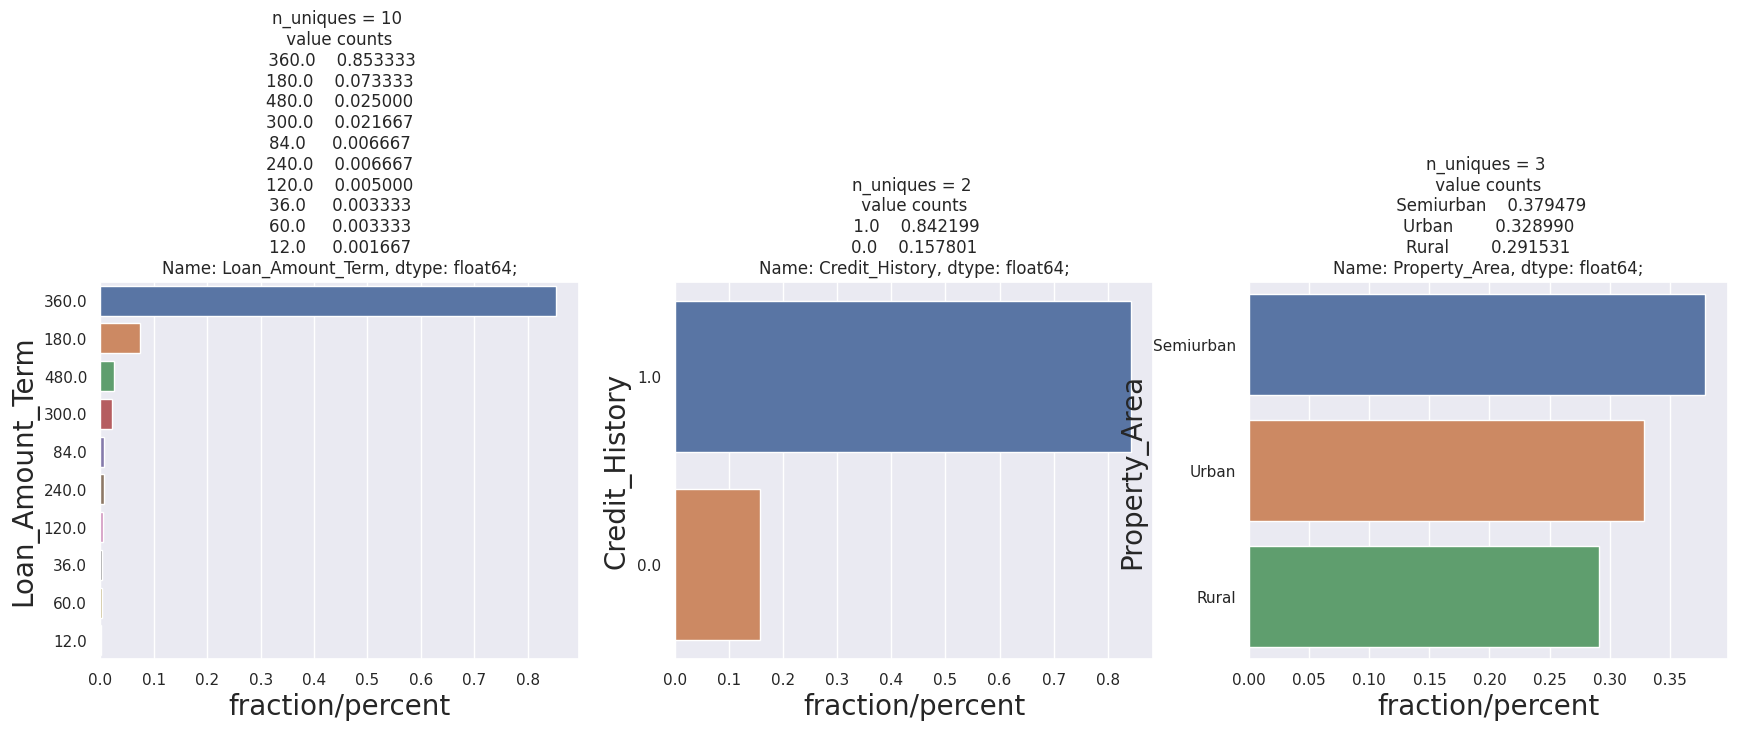

In [ ]:
UVA_category(df,['Loan_Amount_Term','Credit_History','Property_Area'])

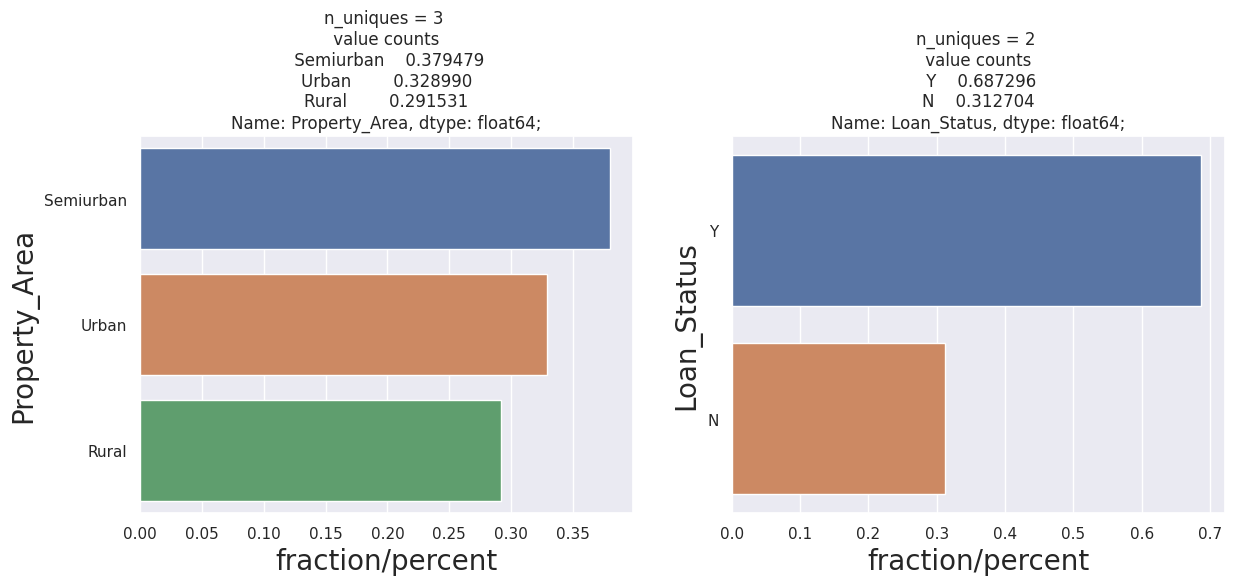

In [ ]:
UVA_category(df,['Property_Area','Loan_Status'])
# PENDING: Evaluate if a balance is needed. 


Categorical variables (The categories in the categorical variables seems to be ok, including the 3+.). 
1. 81% are males,
2. 78% are graduated, 
3. 86% non self-employed, 
4. 85% loan time of 30 years, 
5. 84% with credit history
6.69% loan status YES and 31% NO

# Hypothesis Testing

## Does gender affect loan approval?

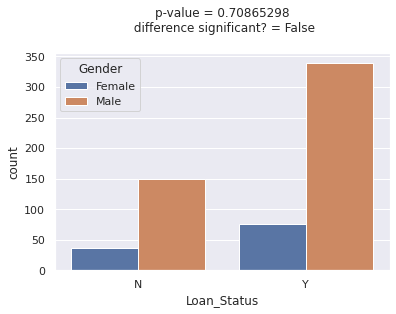

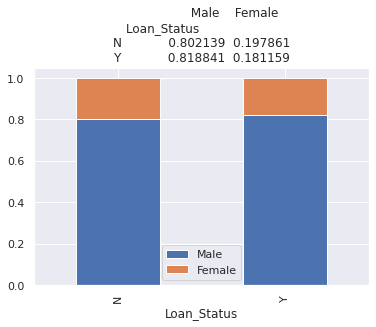

In [ ]:
BVA_categorical_plot(df, 'Gender', 'Loan_Status')

Gender does not affect loan approval. Although we have more male applicants.

## Does marital status affect loan approval?

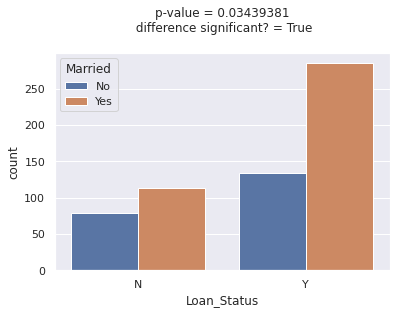

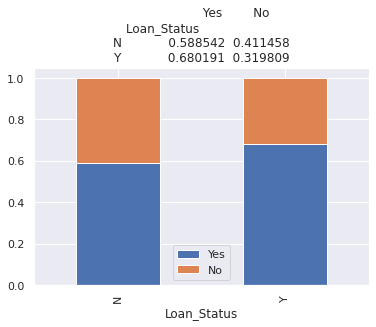

In [ ]:
BVA_categorical_plot(df, 'Married', 'Loan_Status')

Married applicants have higher chances of loan approval.

# Which property has high loan approval rate?

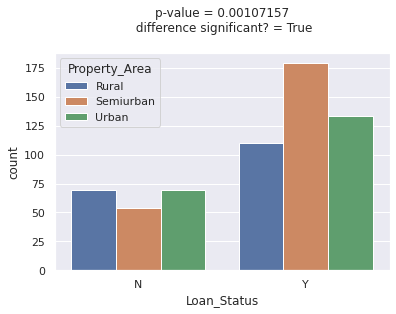

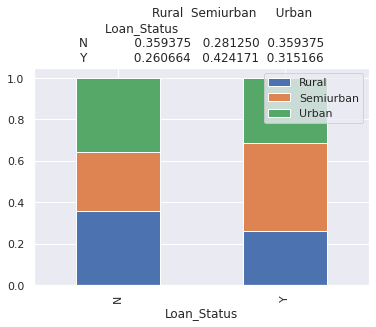

In [ ]:
BVA_categorical_plot(df, 'Property_Area', 'Loan_Status')

Sem-urban properties have the highest rate of loan approval.

## Does having more dependents have an affect on loan approval?

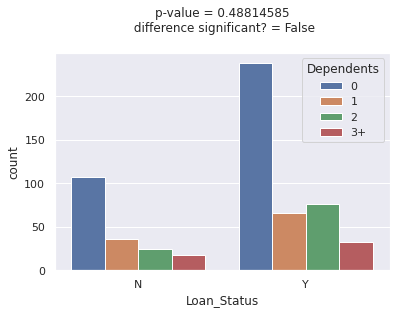

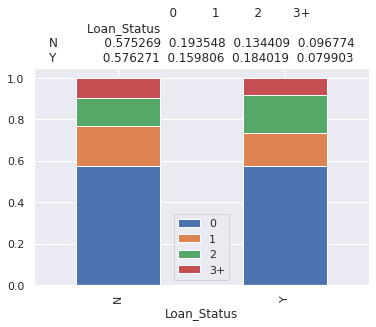

In [ ]:
BVA_categorical_plot(df, 'Dependents', 'Loan_Status')

According to the available data, having more dependents don't affect in loan approval.

## Does having a credit history increases the chances of getting loan approvals?

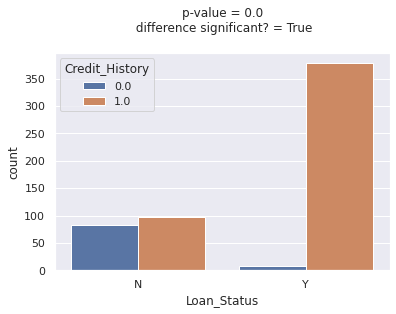

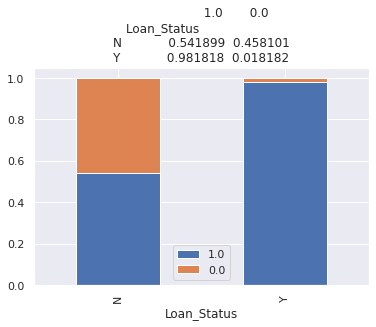

In [ ]:
BVA_categorical_plot(df, 'Credit_History', 'Loan_Status')

Having a credit history leads to higher chances of new loan application approval.

# Missing Data Imputation

In [ ]:
# NAs treatment 
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Outliers Distribution

In [ ]:
# Distribution outliers
distribution, df_outliers = Outliers_Distribution (df)
print(distribution)    
# df = df.drop(df_outliers.index) -- to eliminate outliers
# Outliers have a similar distribution regarding to Loan Status (63% Y - 37% N) 

ApplicantIncome :  -1498.75 ,  10171.25
CoapplicantIncome :  -3445.875 ,  5743.125
LoanAmount :  nan ,  nan
Y    63.64
N    36.36
Name: Loan_Status, dtype: float64


# Modeling Pipeline

In [2]:
# Training ML models
results = ML_Models(df)

Evaluating model SVC...
	Evaluating feature selection method KBest(chi2)...
Results for SVC model with KBest(chi2) feature selection and k=5:
{'model': 'SVC', 'method': 'KBest(chi2)', 'k': 5, 'accuracy': 0.8279569892473119, 'f1': 0.8933333333333334, 'confusion_matrix': array([[10, 15],
       [ 1, 67]]), 'best_params': {'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'linear'}}
Results for SVC model with KBest(chi2) feature selection and k=10:
{'model': 'SVC', 'method': 'KBest(chi2)', 'k': 10, 'accuracy': 0.8064516129032258, 'f1': 0.8783783783783784, 'confusion_matrix': array([[10, 15],
       [ 3, 65]]), 'best_params': {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'rbf'}}
SVC model finished.
Evaluating model LR...
	Evaluating feature selection method KBest(chi2)...
Results for LR model with KBest(chi2) feature selection and k=5:
{'model': 'LR', 'method': 'KBest(chi2)', 'k': 5, 'accuracy': 0.7311827956989247, 'f1': 0.84472049689441, 'confusion_matrix': array([[ 0, 25],
  

In [3]:
print(results)

  model       method   k  accuracy        f1     confusion_matrix  \
0   SVC  KBest(chi2)   5  0.827957  0.893333  [[10, 15], [1, 67]]   
1   SVC  KBest(chi2)  10  0.806452  0.878378  [[10, 15], [3, 65]]   
2    LR  KBest(chi2)   5  0.731183  0.844720   [[0, 25], [0, 68]]   
3    LR  KBest(chi2)  10  0.774194  0.857143   [[9, 16], [5, 63]]   
4    RF  KBest(chi2)   5  0.827957  0.893333  [[10, 15], [1, 67]]   
5    RF  KBest(chi2)  10  0.827957  0.893333  [[10, 15], [1, 67]]   

                                         best_params  
0  {'model__C': 0.1, 'model__gamma': 1, 'model__k...  
1  {'model__C': 10, 'model__gamma': 0.1, 'model__...  
2          {'model__C': 0.1, 'model__penalty': 'l2'}  
3            {'model__C': 5, 'model__penalty': 'l2'}  
4  {'model__max_depth': 3, 'model__max_features':...  
5  {'model__max_depth': 3, 'model__max_features':...  


In [ ]:
# Extra: Creating new dataframe with manual features

dff = create_manual_features (df)
results_dff = ML_Models(dff)

In [ ]:
# Extra: Creating new dataframe with automatic new features

dff2 = create_new_features(df, degree=2)
results_dff2 = ML_Models(dff2_transformed)

Training a **Nueral Network** model

In [ ]:
# Extra: Training a NN network
test_accuracy, f1, cm = NN_Model (df)